# Linear Regression

🎯 In this exercise, you will model the sale price of houses (`SalePrice`) according to their living areas (`GrLivArea`)

👇Load the `houses.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

<details>
    <summary>💡Hint</summary>
    The dataset is located in a parent directory, you should use <code>../</code> in order to find it.
</details>

In [102]:
import pandas as pd

data = pd.read_csv("../data/houses.csv")
data.shape

(1760, 85)

ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## 1. Define the feature set and target

🎯 The objective is to model the sale price of houses in \$ (`SalePrice`) according to their living areas in $ft^2$ (`GrLivArea`).

👇 Assign those two variables to X and y. Remember that X is the feature(s), and y the target.

In [59]:
livecode_data = data[['GrLivArea','SalePrice']]

# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)

LinearRegression()

In [60]:
model.coef_

array([105.00927564])

In [61]:
model.intercept_ 

22104.12101002081

👇 In a scatter plot ([doc](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the living areas and the sale prices.

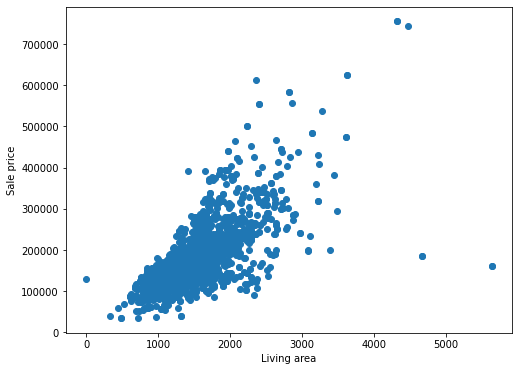

In [62]:
 import matplotlib.pyplot as plt
    
# Plot Living area vs Sale price
plt.figure(figsize=(8,6))
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.show()

ℹ️ The scatter plot should hint at the somewhat linear relationship.

### ☑️ Test your code

In [63]:
from nbresult import ChallengeResult

result = ChallengeResult('variables',
                         variable_X = round(X.mean()).item(),
                         variable_y = round(y.mean())
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_variables.py::TestVariables::test_variable_X PASSED           [ 50%]
tests/test_variables.py::TestVariables::test_variable_y PASSED           [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/variables.pickle

git commit -m 'Completed variables step'

git push origin master


## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting sale price from living area. Save the raw output of the cross validation under a new variable `cv_results`.

In [64]:
 from sklearn.model_selection import cross_validate
# Instanciate model
model = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

In [65]:
# Scores
cv_results['test_score']

array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])

In [66]:
# Mean of scores
cv_results['test_score'].mean()

0.4863112208425962

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [67]:
min_score = cv_results['test_score'].min()
min_score

0.3911751008901019

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [68]:
max_score = cv_results['test_score'].max()
max_score

0.5581065677255257

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [69]:
mean_score = cv_results['test_score'].mean()
mean_score

0.4863112208425962

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [70]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         min_score = min_score,
                         max_score = max_score,
                         mean_score = mean_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 4 items

tests/test_cv_results.py::TestCvResults::test_cv_max PASSED              [ 25%]
tests/test_cv_results.py::TestCvResults::test_cv_mean PASSED             [ 50%]
tests/test_cv_results.py::TestCvResults::test_cv_min PASSED              [ 75%]
tests/test_cv_results.py::TestCvResults::test_cv_results PASSED          [100%]

============================== 4 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master


👇 Plot the evolution of **total computational time** and **mean score** as Kfolds increases from 2 until 40.

In [95]:
total_time = []
mean_score = []

for number in range(2,40,1):
    result_array = cross_validate(model, X, y, cv=number)
    total_time.append(sum(result_array["fit_time"])+sum(result_array["score_time"]))
    mean_score.append(result_array["test_score"].mean())
    

[0.012745380401611328,
 0.007954120635986328,
 0.008503913879394531,
 0.010001897811889648,
 0.019597291946411133,
 0.017896175384521484,
 0.018594980239868164,
 0.018124103546142578,
 0.019513607025146484,
 0.029717683792114258,
 0.02395772933959961,
 0.026477336883544922,
 0.028038740158081055,
 0.03351259231567383,
 0.0348048210144043,
 0.03018498420715332,
 0.03220057487487793,
 0.034173011779785156,
 0.0349879264831543,
 0.03734016418457031,
 0.05655384063720703,
 0.06272649765014648,
 0.05417799949645996,
 0.05550718307495117,
 0.05065298080444336,
 0.054532527923583984,
 0.05880570411682129,
 0.06312823295593262,
 0.06741523742675781,
 0.06702113151550293,
 0.06983518600463867,
 0.06685614585876465,
 0.07427358627319336,
 0.07360339164733887,
 0.07466769218444824,
 0.07732605934143066,
 0.0778963565826416,
 0.08803892135620117]

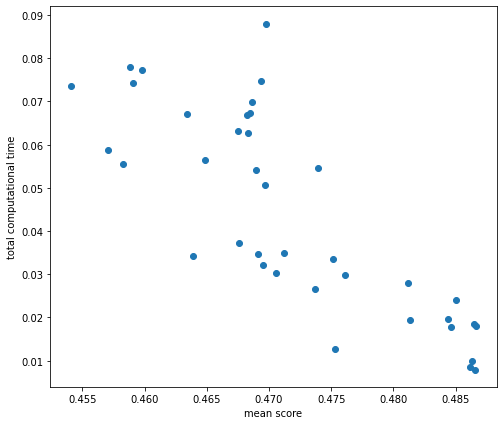

In [97]:
plt.figure(figsize=(8,7))
plt.scatter(mean_score, total_time)

# Labels
plt.xlabel("mean score")
plt.ylabel("total computational time")
plt.show()

ℹ️ You will notice that while the score stabilizes, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

👇 Go ahead and train the model. Save the trained model under the variable `model`.

In [109]:
from sklearn.model_selection import train_test_split
# Ready X and y
X = data[['GrLivArea']]
y = data['SalePrice']
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [111]:
# Instanciate the model
model = LinearRegression()
# Train the model on the Training data
model.fit(X_train, y_train)
# Score the model on the Testing data
model.score(X_test,y_test)

0.527424919994236

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [113]:
slope = model.coef_

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [114]:
intercept = model.intercept_ 

### ☑️ Test your code

In [115]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         model = model,
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_trained_model.py::TestTrainedModel::test_intercept PASSED     [ 50%]
tests/test_trained_model.py::TestTrainedModel::test_slope PASSED         [100%]

============================== 2 passed in 2.06s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master


## 4. Visualize the model

👇 With matplotlib: 
- Define the line of best fit equation (using the slope and intercept values)
- Plot it in a graph over the scattered data points

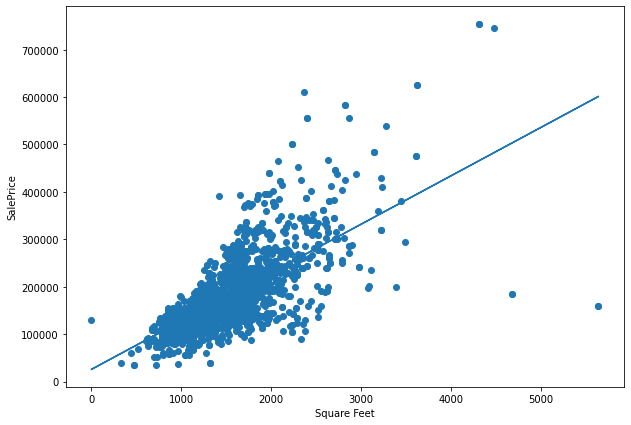

In [125]:
livecode_data.head()
x_ = livecode_data["GrLivArea"]
y_ = livecode_data["SalePrice"]
plt.figure(figsize=(10,7))
plt.scatter(x=x_, y=y_);

plt.plot(livecode_data["GrLivArea"], intercept + slope*livecode_data["GrLivArea"])
plt.xlabel('Square Feet');
plt.ylabel('SalePrice');
plt.show()

# 5. Predict

👇 Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [130]:
prediction = model.predict([[1500]])
prediction[0]

178625.3724523697

### ☑️ Test your code

In [131]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁